In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
label_dict = pickle.load(open('../data/label_dict.pkl', 'rb'))

In [3]:
def train_with_10fold(model, name, data_dir='../data/pca'):
    accuracies = []
    all_preds = []
    all_labels = []

    for test_id in range(10):
        dfs = []
        for i in range(10):
            if i != test_id:
                df = pd.read_csv(f'{data_dir}/fold{i}.csv')
                dfs.append(df)
        train_df = pd.concat(dfs, ignore_index=True)
        test_df = pd.read_csv(f'{data_dir}/fold{test_id}.csv')

        # X, y
        X_train, y_train = train_df.drop('label', axis=1), train_df['label']
        X_test, y_test = test_df.drop('label', axis=1), test_df['label']

        # 訓練 & 評估
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        all_preds.extend(y_pred)
        all_labels.extend(y_test)

        print(f'Fold {test_id} Accuracy: {acc:.4f}')

    print(f'\nAverage Accuracy: {np.mean(accuracies):.4f}')
    print(f'Total: {len(all_labels)}')

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (10-Fold CV) Using {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print(classification_report(all_labels, all_preds))

    return all_preds, all_labels


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Fold 0 Accuracy: 0.3814
Fold 1 Accuracy: 0.3930


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Fold 2 Accuracy: 0.3600
Fold 3 Accuracy: 0.4202


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Fold 4 Accuracy: 0.4476
Fold 5 Accuracy: 0.2831


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Fold 6 Accuracy: 0.3986
Fold 7 Accuracy: 0.4045


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Fold 8 Accuracy: 0.4755
Fold 9 Accuracy: 0.3835

Average Accuracy: 0.3947
Total: 8732


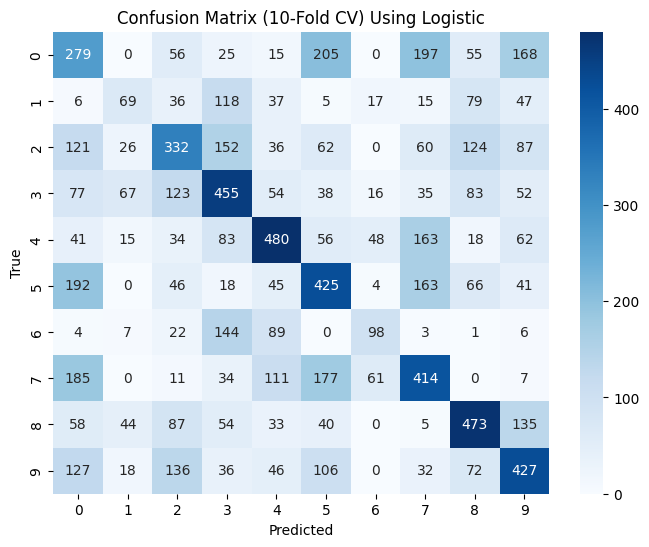

              precision    recall  f1-score   support

           0       0.26      0.28      0.27      1000
           1       0.28      0.16      0.20       429
           2       0.38      0.33      0.35      1000
           3       0.41      0.46      0.43      1000
           4       0.51      0.48      0.49      1000
           5       0.38      0.42      0.40      1000
           6       0.40      0.26      0.32       374
           7       0.38      0.41      0.40      1000
           8       0.49      0.51      0.50       929
           9       0.41      0.43      0.42      1000

    accuracy                           0.40      8732
   macro avg       0.39      0.37      0.38      8732
weighted avg       0.39      0.40      0.39      8732



In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(verbose=0)
_ = train_with_10fold(lr, 'Logistic')


Fold 0 Accuracy: 0.3391
Fold 1 Accuracy: 0.3119
Fold 2 Accuracy: 0.2141
Fold 3 Accuracy: 0.3535
Fold 4 Accuracy: 0.2393
Fold 5 Accuracy: 0.3062
Fold 6 Accuracy: 0.3270
Fold 7 Accuracy: 0.3189
Fold 8 Accuracy: 0.3370
Fold 9 Accuracy: 0.2951

Average Accuracy: 0.3042
Total: 8732


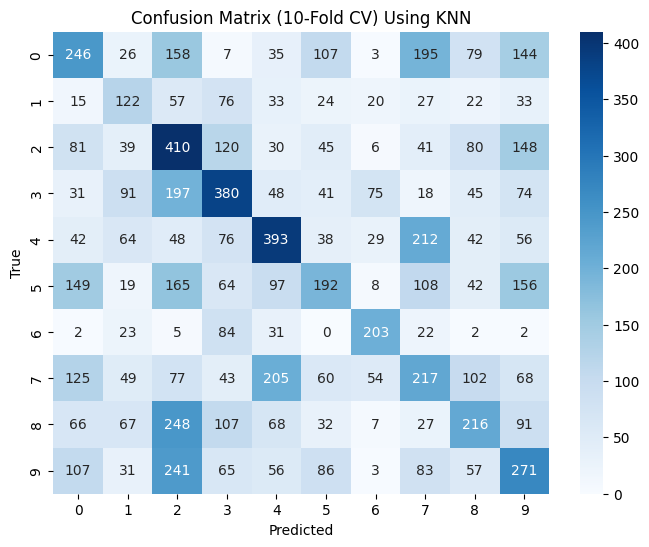

              precision    recall  f1-score   support

           0       0.28      0.25      0.26      1000
           1       0.23      0.28      0.25       429
           2       0.26      0.41      0.31      1000
           3       0.37      0.38      0.38      1000
           4       0.39      0.39      0.39      1000
           5       0.31      0.19      0.24      1000
           6       0.50      0.54      0.52       374
           7       0.23      0.22      0.22      1000
           8       0.31      0.23      0.27       929
           9       0.26      0.27      0.27      1000

    accuracy                           0.30      8732
   macro avg       0.31      0.32      0.31      8732
weighted avg       0.31      0.30      0.30      8732



In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
_ = train_with_10fold(knn, 'KNN')

Fold 0 Accuracy: 0.4364
Fold 1 Accuracy: 0.3829
Fold 2 Accuracy: 0.3286
Fold 3 Accuracy: 0.4152
Fold 4 Accuracy: 0.3013
Fold 5 Accuracy: 0.3232
Fold 6 Accuracy: 0.4344
Fold 7 Accuracy: 0.4442
Fold 8 Accuracy: 0.5466
Fold 9 Accuracy: 0.4002

Average Accuracy: 0.4013
Total: 8732


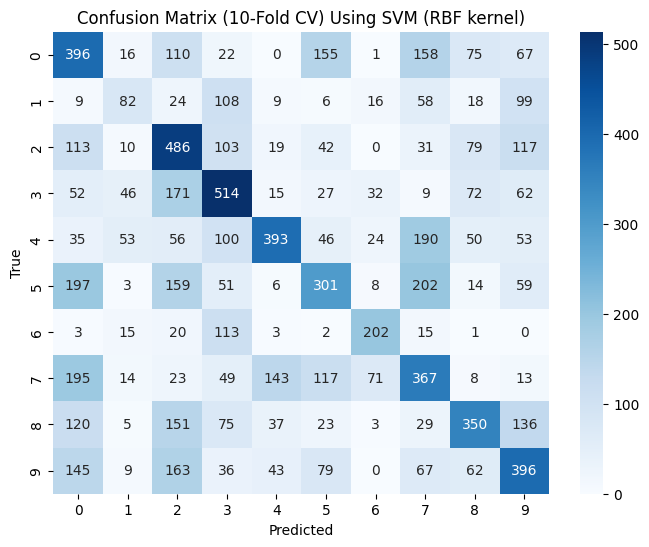

              precision    recall  f1-score   support

           0       0.31      0.40      0.35      1000
           1       0.32      0.19      0.24       429
           2       0.36      0.49      0.41      1000
           3       0.44      0.51      0.47      1000
           4       0.59      0.39      0.47      1000
           5       0.38      0.30      0.33      1000
           6       0.57      0.54      0.55       374
           7       0.33      0.37      0.35      1000
           8       0.48      0.38      0.42       929
           9       0.40      0.40      0.40      1000

    accuracy                           0.40      8732
   macro avg       0.42      0.40      0.40      8732
weighted avg       0.41      0.40      0.40      8732



In [7]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
_ = train_with_10fold(svc, 'SVM (RBF kernel)')


Fold 0 Accuracy: 0.5063
Fold 1 Accuracy: 0.4628
Fold 2 Accuracy: 0.5222
Fold 3 Accuracy: 0.5283
Fold 4 Accuracy: 0.5096
Fold 5 Accuracy: 0.5128
Fold 6 Accuracy: 0.5776
Fold 7 Accuracy: 0.5000
Fold 8 Accuracy: 0.6225
Fold 9 Accuracy: 0.5185

Average Accuracy: 0.5261
Total: 8732


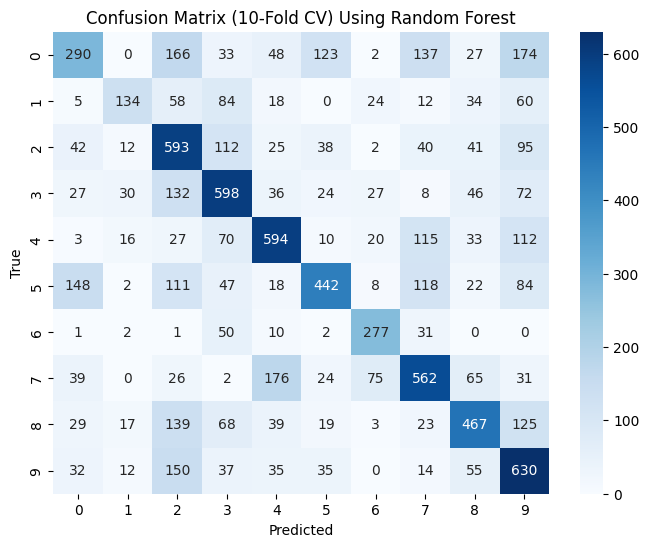

              precision    recall  f1-score   support

           0       0.47      0.29      0.36      1000
           1       0.60      0.31      0.41       429
           2       0.42      0.59      0.49      1000
           3       0.54      0.60      0.57      1000
           4       0.59      0.59      0.59      1000
           5       0.62      0.44      0.51      1000
           6       0.63      0.74      0.68       374
           7       0.53      0.56      0.55      1000
           8       0.59      0.50      0.54       929
           9       0.46      0.63      0.53      1000

    accuracy                           0.53      8732
   macro avg       0.55      0.53      0.52      8732
weighted avg       0.54      0.53      0.52      8732



In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
_ = train_with_10fold(rf, 'Random Forest')

Fold 0 Accuracy: 0.4983
Fold 1 Accuracy: 0.4797
Fold 2 Accuracy: 0.4995
Fold 3 Accuracy: 0.5061
Fold 4 Accuracy: 0.5534
Fold 5 Accuracy: 0.5018
Fold 6 Accuracy: 0.5179
Fold 7 Accuracy: 0.4789
Fold 8 Accuracy: 0.6446
Fold 9 Accuracy: 0.5090

Average Accuracy: 0.5189
Total: 8732


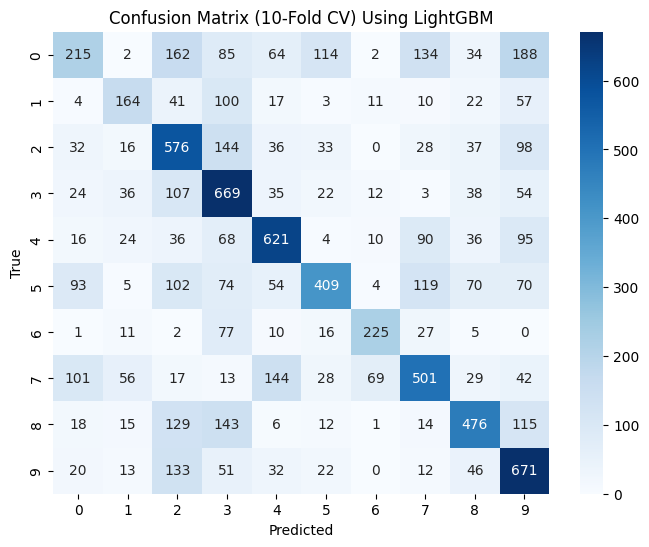

              precision    recall  f1-score   support

           0       0.41      0.21      0.28      1000
           1       0.48      0.38      0.43       429
           2       0.44      0.58      0.50      1000
           3       0.47      0.67      0.55      1000
           4       0.61      0.62      0.62      1000
           5       0.62      0.41      0.49      1000
           6       0.67      0.60      0.64       374
           7       0.53      0.50      0.52      1000
           8       0.60      0.51      0.55       929
           9       0.48      0.67      0.56      1000

    accuracy                           0.52      8732
   macro avg       0.53      0.52      0.51      8732
weighted avg       0.52      0.52      0.51      8732



In [4]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(verbose = 0)
_ = train_with_10fold(lgb, 'LightGBM')

Fold 0 Accuracy: 0.4708
Fold 1 Accuracy: 0.4741
Fold 2 Accuracy: 0.5103
Fold 3 Accuracy: 0.4869
Fold 4 Accuracy: 0.5160
Fold 5 Accuracy: 0.4970
Fold 6 Accuracy: 0.5179
Fold 7 Accuracy: 0.4628
Fold 8 Accuracy: 0.6140
Fold 9 Accuracy: 0.5388

Average Accuracy: 0.5088
Total: 8732


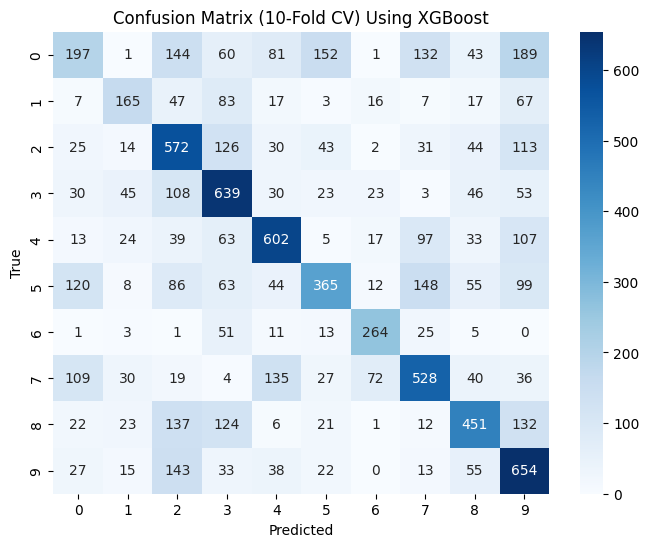

              precision    recall  f1-score   support

           0       0.36      0.20      0.25      1000
           1       0.50      0.38      0.44       429
           2       0.44      0.57      0.50      1000
           3       0.51      0.64      0.57      1000
           4       0.61      0.60      0.60      1000
           5       0.54      0.36      0.44      1000
           6       0.65      0.71      0.68       374
           7       0.53      0.53      0.53      1000
           8       0.57      0.49      0.53       929
           9       0.45      0.65      0.53      1000

    accuracy                           0.51      8732
   macro avg       0.52      0.51      0.51      8732
weighted avg       0.51      0.51      0.50      8732



In [10]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
_ = train_with_10fold(xgb, 'XGBoost')

In [11]:
results_before_tuning = {
    'Logistic': {'0': 0.27, '1': 0.20, '2': 0.35, '3': 0.43, '4': 0.49, 
                 '5': 0.40, '6': 0.32, '7': 0.40, '8': 0.50, '9': 0.42},
    'KNN':      {'0': 0.26, '1': 0.25, '2': 0.31, '3': 0.38, '4': 0.39, 
                 '5': 0.24, '6': 0.52, '7': 0.22, '8': 0.27, '9': 0.27},
    'SVM-RBF':  {'0': 0.35, '1': 0.24, '2': 0.41, '3': 0.47, '4': 0.47, 
                 '5': 0.33, '6': 0.55, '7': 0.35, '8': 0.42, '9': 0.40},
    'RF':       {'0': 0.36, '1': 0.41, '2': 0.49, '3': 0.57, '4': 0.59, 
                 '5': 0.51, '6': 0.68, '7': 0.55, '8': 0.54, '9': 0.53},
    'LGBM':     {'0': 0.28, '1': 0.43, '2': 0.50, '3': 0.55, '4': 0.62, 
                 '5': 0.49, '6': 0.64, '7': 0.52, '8': 0.55, '9': 0.56},
    'XGB':      {'0': 0.25, '1': 0.44, '2': 0.50, '3': 0.57, '4': 0.60, 
                 '5': 0.44, '6': 0.68, '7': 0.53, '8': 0.53, '9': 0.53},
}

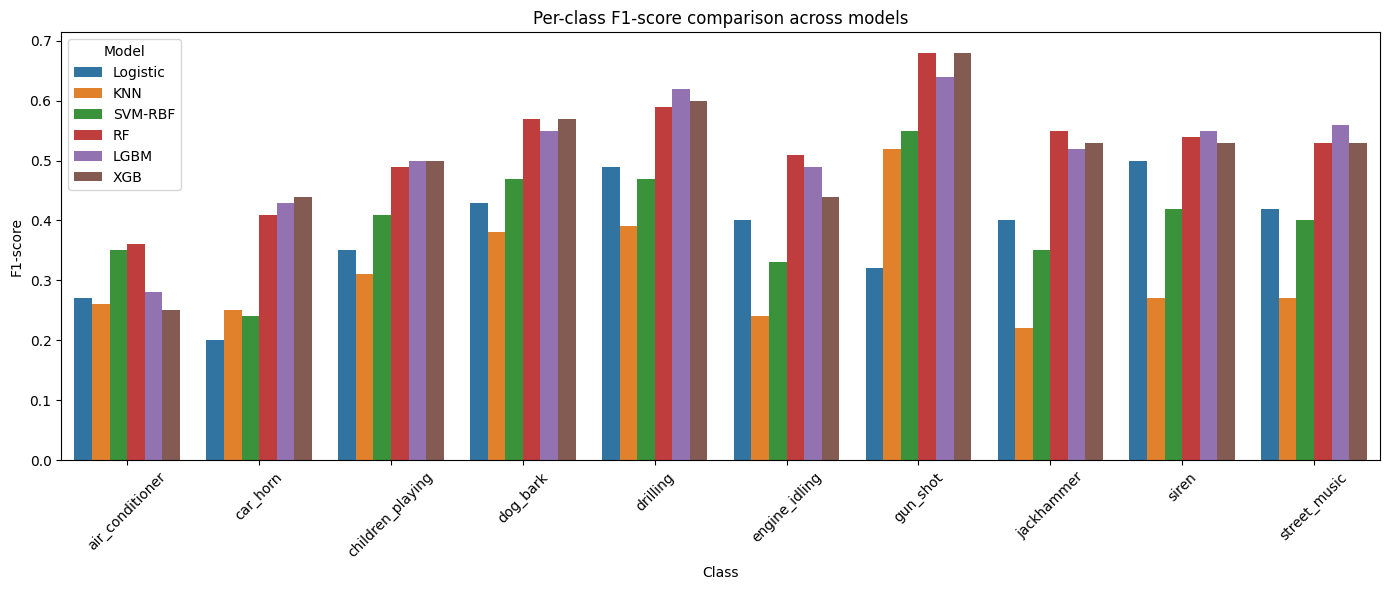

In [12]:
df = pd.DataFrame(results_before_tuning).T  # 模型為 index，label 為 column
df = df.reset_index().melt(id_vars='index', var_name='Class', value_name='F1-score')
df.rename(columns={'index': 'Model'}, inplace=True)

# 對照 label 名稱（如果有 label_dict 的話）
df['Class'] = df['Class'].astype(int).map(label_dict)

# 繪圖
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Class', y='F1-score', hue='Model')
plt.xticks(rotation=45)
plt.title("Per-class F1-score comparison across models")
plt.tight_layout()
plt.show()

In [11]:
def train_with_10fold_for_optuna(model, data_dir='../data/pca'):
    accuracies = []

    for test_id in range(10):
        # Combine folds except the test fold
        dfs = [pd.read_csv(f'{data_dir}/fold{i}.csv') for i in range(10) if i != test_id]
        train_df = pd.concat(dfs, ignore_index=True)
        test_df = pd.read_csv(f'{data_dir}/fold{test_id}.csv')

        X_train, y_train = train_df.drop('label', axis=1), train_df['label']
        X_test, y_test = test_df.drop('label', axis=1), test_df['label']

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    return np.mean(accuracies)


In [ ]:
import optuna

def objective(trial):
    """
    Optuna 優化 LightGBMClassifier 的目標函式。
    """
    params = {
        'objective': 'multiclass',  
        'num_class': trial.suggest_int('num_class', 10, 10), 
        'metric': 'multi_logloss',       
        'boosting_type': 'gbdt',    

        # 核心參數
        'n_estimators': trial.suggest_int('n_estimators', 1000, 2500, step=100), 		# 樹的數量，LGBM 通常需要更多樹
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True), 	# 學習率，log 探索更有效
        'num_leaves': trial.suggest_int('num_leaves', 20, 80, step=5), 					# 樹的最大葉子數，控制複雜度
        'max_depth': trial.suggest_int('max_depth', 5, 15), 							# 樹的最大深度，進一步控制複雜度，避免過擬合
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100, step=10), 	# 葉子節點所需的最小樣本數

        # 正則化參數
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-6, 1.0, log=True), 	# L1 正則化
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-6, 1.0, log=True), 	# L2 正則化

        # 其他參數
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1
    }

    # 實例化 LightGBM 分類器
    model = LGBMClassifier(**params)

    # 這裡假設 train_with_10fold_for_optuna 會返回一個數值，Optuna 將嘗試最大化它
    # 請確保 train_with_10fold_for_optuna 函式與 LightGBMClassifier 兼容
    return train_with_10fold_for_optuna(model)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Accuracy:", study.best_value)


[I 2025-05-26 05:06:46,443] A new study created in memory with name: no-name-ccc496db-aecf-4ddd-88d4-8f6a798cd1b2
[I 2025-05-26 05:08:50,299] Trial 0 finished with value: 0.52426021851096 and parameters: {'learning_rate': 0.025053943405868768, 'num_leaves': 45, 'min_child_samples': 30, 'reg_alpha': 0.0034890330215186626, 'reg_lambda': 0.0026809084456851278}. Best is trial 0 with value: 0.52426021851096.
[I 2025-05-26 05:10:22,525] Trial 1 finished with value: 0.5288065030422469 and parameters: {'learning_rate': 0.01258923214800631, 'num_leaves': 30, 'min_child_samples': 50, 'reg_alpha': 0.011418133080199207, 'reg_lambda': 0.032197861577590046}. Best is trial 1 with value: 0.5288065030422469.
[I 2025-05-26 05:11:42,000] Trial 2 finished with value: 0.531042822390215 and parameters: {'learning_rate': 0.038227132770052547, 'num_leaves': 30, 'min_child_samples': 40, 'reg_alpha': 0.0020742358535933174, 'reg_lambda': 0.03674000424541583}. Best is trial 2 with value: 0.531042822390215.
[I 202

Best Params: {'learning_rate': 0.04864613150134012, 'num_leaves': 25, 'min_child_samples': 40, 'reg_alpha': 0.08012695708110351, 'reg_lambda': 0.010485102276029307}
Best Accuracy: 0.5316539517831992


In [13]:
params = study.best_params

Fold 0 Accuracy: 0.5120
Fold 1 Accuracy: 0.4887
Fold 2 Accuracy: 0.5222
Fold 3 Accuracy: 0.5162
Fold 4 Accuracy: 0.5502
Fold 5 Accuracy: 0.5018
Fold 6 Accuracy: 0.5573
Fold 7 Accuracy: 0.5199
Fold 8 Accuracy: 0.6189
Fold 9 Accuracy: 0.5245

Average Accuracy: 0.5312
Total: 8732


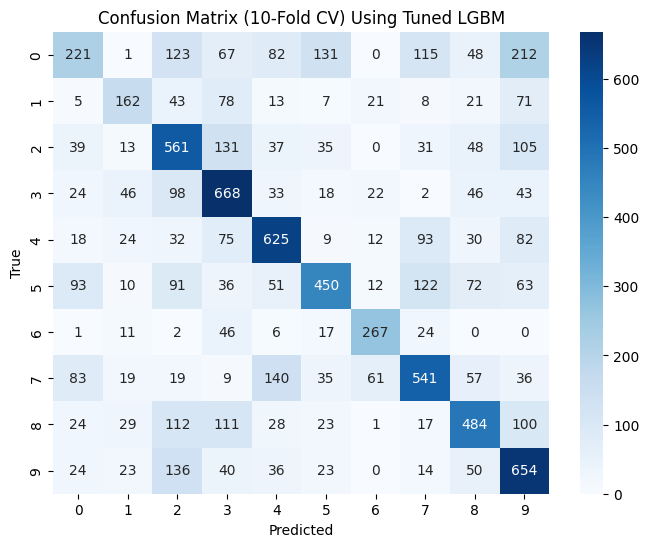

              precision    recall  f1-score   support

           0       0.42      0.22      0.29      1000
           1       0.48      0.38      0.42       429
           2       0.46      0.56      0.51      1000
           3       0.53      0.67      0.59      1000
           4       0.59      0.62      0.61      1000
           5       0.60      0.45      0.51      1000
           6       0.67      0.71      0.69       374
           7       0.56      0.54      0.55      1000
           8       0.57      0.52      0.54       929
           9       0.48      0.65      0.55      1000

    accuracy                           0.53      8732
   macro avg       0.54      0.53      0.53      8732
weighted avg       0.53      0.53      0.52      8732



In [16]:
lgbm = LGBMClassifier(**params)
all_preds, all_labels = train_with_10fold(lgbm, 'Tuned LGBM')

In [7]:
lgbm_F1 = {
    'Before Tuning':	{'0': 0.28, '1': 0.43, '2': 0.50, '3': 0.55, '4': 0.62, 
                 		 '5': 0.49, '6': 0.64, '7': 0.52, '8': 0.55, '9': 0.56},
    'Tuned':      		{'0': 0.29, '1': 0.42, '2': 0.51, '3': 0.59, '4': 0.61, 
                 		 '5': 0.51, '6': 0.69, '7': 0.55, '8': 0.54, '9': 0.55},
}

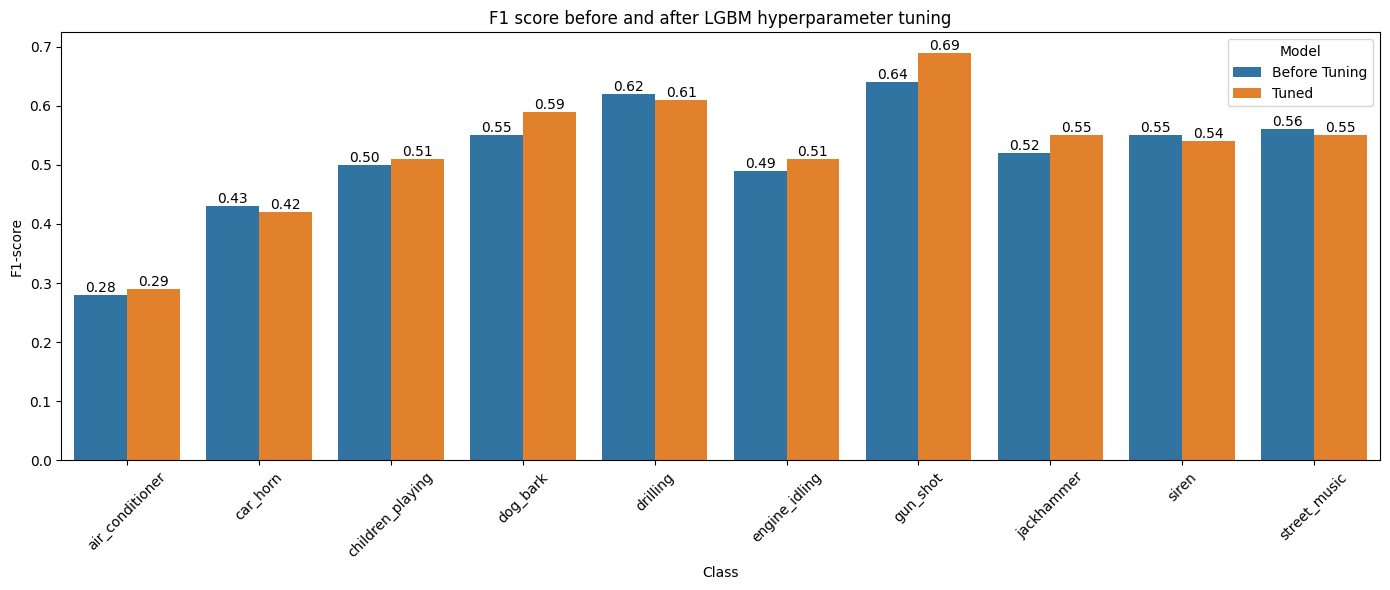

In [9]:
df = pd.DataFrame(lgbm_F1).T  # 模型為 index，label 為 column
df = df.reset_index().melt(id_vars='index', var_name='Class', value_name='F1-score')
df.rename(columns={'index': 'Model'}, inplace=True)

# 對照 label 名稱（如果有 label_dict 的話）
df['Class'] = df['Class'].astype(int).map(label_dict)

# 繪圖
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df, x='Class', y='F1-score', hue='Model')
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10)
ax.bar_label(ax.containers[1], fmt='%.2f', fontsize=10)
plt.xticks(rotation=45)
plt.title("F1 score before and after LGBM hyperparameter tuning")
plt.tight_layout()
plt.show()

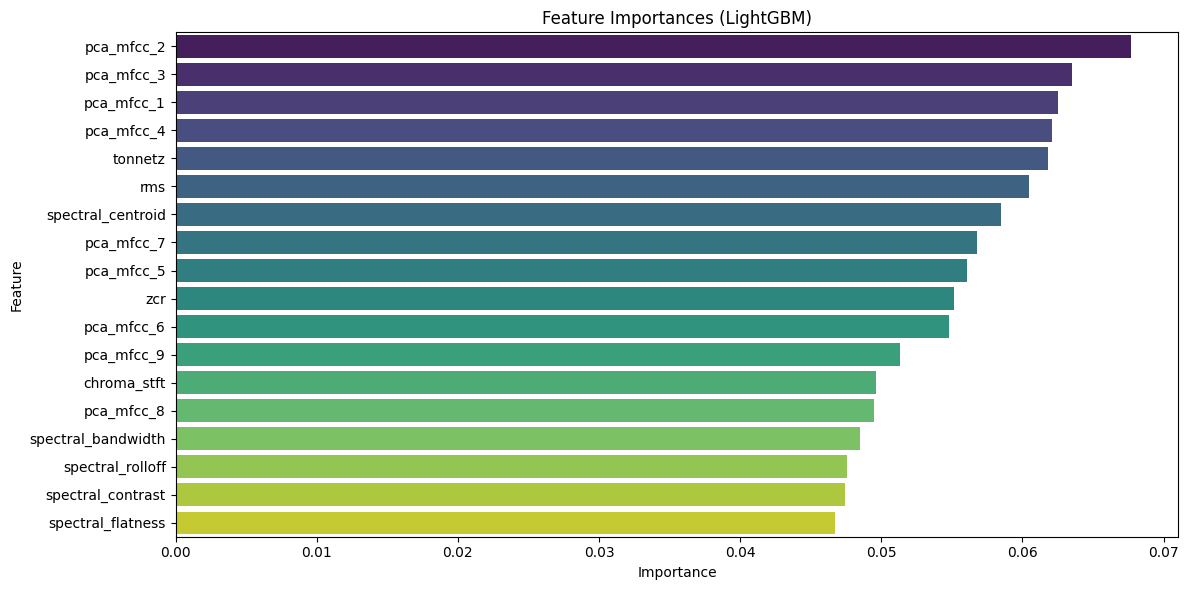

In [28]:
data = pd.read_csv('../data/pca/fold5.csv')
X = data.drop(['label'], axis=1)

importances = lgbm.feature_importances_
importances_normalized = importances / importances.sum()
feature_names = X.columns

# 排序後畫圖
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_normalized})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis', hue='Feature', legend=False)
plt.title("Feature Importances (LightGBM)")
plt.tight_layout()
plt.show()

In [29]:
pickle.dump(params, open('../models/LGBM_param_grid.pkl', 'wb'))